In [129]:
import pandas as pd
df = pd.read_csv('input.csv')
df

,bus_id,time,nextstationtimining,flow
0,yeola,09:10:22,09:48:32,1
1,kopargaon,09:50:00,10:45:33,1
2,kopargaon,17:47:14,18:28:48,0
3,shirdi,12:34:23,13:05:23,0
4,pune,07:08:12,12:34:22,0
5,shirdi,10:47:22,15:17:22,1


In [130]:
def convert_time_to_seconds(time_str):
  """
  Converts a string of the format "hrs-min-sec" into seconds as an integer.

  Args:
    time_str: A string of the format "hrs-min-sec".

  Returns:
    An integer representing the time in seconds.
  """

  hours, minutes, seconds = time_str.split(':')
  if hours=='':
    hours =0
  if minutes=='':
    minutes =0
  if seconds=='':
    seconds=0
  hours = int(hours)
  minutes = int(minutes)
  seconds = int(seconds)
  return hours * 3600 + minutes * 60 + seconds

# Example usage
time_str = "2:30:45"
seconds = convert_time_to_seconds(time_str)
print(f"{time_str} in seconds is {seconds}")

2:30:45 in seconds is 9045


In [131]:
df['time'] = df['time'].apply(convert_time_to_seconds)
df['nextstationtimining'] =df['nextstationtimining'].apply(convert_time_to_seconds)
df

,bus_id,time,nextstationtimining,flow
0,yeola,33022,35312,1
1,kopargaon,35400,38733,1
2,kopargaon,64034,66528,0
3,shirdi,45263,47123,0
4,pune,25692,45262,0
5,shirdi,38842,55042,1


In [132]:
X = df[df['bus_id']=='shirdi'].drop(['bus_id','nextstationtimining'],axis='columns')
y = df[df['bus_id']=='shirdi']['nextstationtimining']
y

3    47123
5    55042
Name: nextstationtimining, dtype: int64

In [133]:
X

,time,flow
3,45263,0
5,38842,1


In [134]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

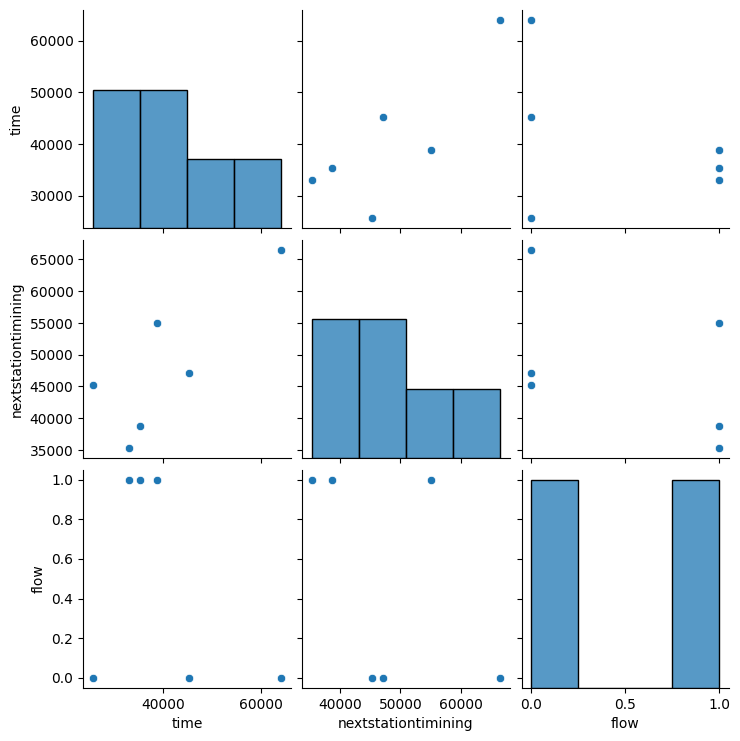

In [135]:
import seaborn as sns
sns.pairplot(df)

In [136]:
model.fit(X,y)

LinearRegression()

In [137]:
model.score(X,y)

1.0

In [139]:
model.predict([[40832,1]])

c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([52587.73904099])

In [141]:
import pickle
with open('bus_predictin_model','wb') as f:
    pickle.dump(model,f)